# BME-230A: Homework 2 Part A 

Your assignment for homework 2A is to redo the linear regression analysis, but using a different classification method from SKLearn. 

Copy this notebook and complete the homework as an IPython notebook. Submit the notebook file to Canvas to complete the homework.

Use the same dataset:
https://drive.google.com/file/d/1FZbQCEHr2Rie4cXSM6Udg0SaWTtPnEHO/view?usp=sharing

Goals and Requirements:
1. Select a classification method from [SKLearn](http://scikit-learn.org/):
    * We recommend logistic regression or any forest method as they are fairly intuitive. Feel free to investigate a method for regularization of the model (preventing over training).

2. Write a short explanation of the method and how it works (look for explanations in documention, youtube, or online).

3. Try to achieve the highest accuracy / estimator quality.

*Notes*:

Use a reasonable train/test split of 80%/20% or even 70%/30% to avoid too much variance in your estimate of accuracy, FPR and TPR. 

## Method

Describe the method you have selected and give a short explanation of how it works. Feel free to include a textual description and any mathematics you feel relevant.

  - In this homework, I opt-in to use a logistic regression for my approach. Even though the name of the model is a regression, it has been adapted to fit a linear classfication model (as per sklearn documentation). 
  - In general, logistic regression is a supervised learning classification model used to predict the probability of a certain value using a **logistic function**. Typically, it uses a succes or failure binary code as its output (this is called a binary logistic regresstion) however, there can be different kinds of logistic regression. Other kinds include: Multinomial regressions (where there may be outcome other than a 1 or 0 in *any order*) and Ordinal (where it can also have many outcomes more than a 1 or 0 but in this canse the outputs must be *ordered*.)


# Your Code

Below include your code

In [ ]:
import sklearn
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#check if we have sklearn installed
try:
  from sklearn import datasets, linear_model, preprocessing
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score, confusion_matrix
except:
  !pip install sklearn
  from sklearn import datasets, linear_model, preprocessing
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
#Get file
url = 'https://raw.githubusercontent.com/benedictpaten/intro_python/main/lecture_notebooks/data/breast-cancer-wisconsin.data.csv'
cancer_data_file = 'cancer_data.csv'
urllib.request.urlretrieve(url, cancer_data_file)

('cancer_data.csv', <http.client.HTTPMessage at 0x7f61ee91f340>)

In [ ]:
#Loading data
df = pd.read_csv('cancer_data.csv')
df.head(5)

,id,clump-thickness,uniformity-of-cell-size,uniformity-of-cell-shape,marginal-adhesion,single-epithelial-cell-size,bare-nuclei,bland-chromatin,normal-nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
#Preprocessing data

encoder = preprocessing.LabelEncoder()

for col in df.columns:
  df[col] = encoder.fit_transform(df[col])

df.head(5)

,id,clump-thickness,uniformity-of-cell-size,uniformity-of-cell-shape,marginal-adhesion,single-epithelial-cell-size,bare-nuclei,bland-chromatin,normal-nucleoli,mitoses,class
0,172,4,0,0,0,1,0,2,0,0,0
1,175,4,3,3,4,6,1,2,1,0,0
2,176,2,0,0,0,1,2,2,0,0,0
3,177,5,7,7,0,2,4,2,6,0,0
4,179,3,0,0,2,1,0,2,0,0,0


In [ ]:
#sklearn model

x = df[['mitoses']]
y = df['class']

lm_model = linear_model.LogisticRegression(fit_intercept=True, n_jobs=1)
lm_model.fit(x,y)
print("sklearn, w, b, score: ", round(lm_model.coef_[0][0],6), round(lm_model.intercept_[0],6), round(lm_model.score(x,y), 6))

sklearn, w, b, score:  1.308427 -1.109676 0.7897


In [ ]:
#Variable Selection
features = list(df.keys())
features.remove('id')
features.remove('class')

feature_scores = []

for feature in features:
    x = df[[feature]]
    y = df['class']
    lm_model = linear_model.LogisticRegression(fit_intercept=True, n_jobs=1)
    lm_model.fit(x, y)
    feature_scores.append([feature, lm_model.score(x,y)])

feature_scores.sort(key=lambda x: x[1], reverse=True)
for feature_score in feature_scores:
    print(feature_score)

['uniformity-of-cell-size', 0.927038626609442]
['uniformity-of-cell-shape', 0.9227467811158798]
['bland-chromatin', 0.9070100143061517]
['single-epithelial-cell-size', 0.8755364806866953]
['normal-nucleoli', 0.8669527896995708]
['marginal-adhesion', 0.8640915593705293]
['clump-thickness', 0.8612303290414879]
['mitoses', 0.7896995708154506]
['bare-nuclei', 0.7138769670958512]


In [ ]:
#multiple variables
x = df[['uniformity-of-cell-shape','uniformity-of-cell-size', 'bland-chromatin']]
y = df['class']
lm_model = linear_model.LogisticRegression(fit_intercept=True, n_jobs=1)
lm_model.fit(x, y)
print("Score: ", lm_model.score(x,y))

Score:  0.9470672389127325


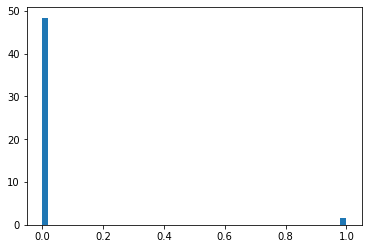

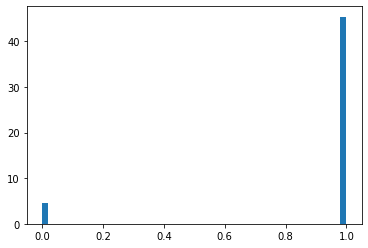

In [ ]:
input_0 = df.loc[df['class'] == 0]
y_0 = input_0['class']
x_0 = input_0[['uniformity-of-cell-shape','uniformity-of-cell-size', 'bland-chromatin']]

input_1 = df.loc[df['class'] == 1]
y_1 = input_1['class']
x_1 = input_1[['uniformity-of-cell-shape','uniformity-of-cell-size', 'bland-chromatin']]
preds_0 = lm_model.predict(x_0)
preds_1 = lm_model.predict(x_1)
n, bins, patches = plt.hist(preds_0, bins=50, density=1, cumulative=0)
plt.show()
n, bins, patches = plt.hist(preds_1, bins=50, density=1, cumulative=0)
plt.show()

# Classification
Create training/test splits and train the classifier. Report the accuracy, FPR and TPR.

In [ ]:
#accuracy
y_pred = lm_model.predict(x)
y_pred = [1 if p > 0.5 else 0 for p in y_pred] # Binarizing the predictions using
# a cutoff of 0.5
accuracy_score(y, y_pred)

0.9470672389127325

In [ ]:
#splitting data
(train,test) = train_test_split(df, test_size=0.2)

train_output = train['class']
train_input = train[['uniformity-of-cell-shape','uniformity-of-cell-size']]

test_output = test['class']
test_input = test[['uniformity-of-cell-shape','uniformity-of-cell-size']]

In [ ]:
#training data
lm_model.fit(train_input, train_output)
print("Score: ", lm_model.score(train_input, train_output))
y_pred = lm_model.predict(test_input)
y_pred = [1 if p > 0.5 else 0 for p in y_pred]
print(f'Accuracy Score: {accuracy_score(test_output, y_pred)}')

Score:  0.9409660107334525
Accuracy Score: 0.9642857142857143


In [ ]:
#Confusion Matrix
print(confusion_matrix(test_output, y_pred))
tn, fp, fn, tp = confusion_matrix(test_output, y_pred).ravel()
fpr = fp * 1.0 / (fp+tn) # Fraction of true negative cases with a positive prediction
fnr = fn * 1.0 / (tp+fn) # Fraction of true positive cases with a negative prediction
print("False positive rate: (predicting malignant while benign)", fpr)
print("False negative rate: (predicting benign while malignant)", fnr)

[[108   3]
 [  2  27]]
False positive rate: (predicting malignant while benign) 0.02702702702702703
False negative rate: (predicting benign while malignant) 0.06896551724137931


In [ ]:
y_pred = lm_model.predict(test_input)
y_pred = [1 if p > 0.5 else 0 for p in y_pred]

print("Accuracy", accuracy_score(test_output, y_pred))

print(confusion_matrix(test_output, y_pred))
tn, fp, fn, tp = confusion_matrix(test_output, y_pred).ravel()
fpr = fp * 1.0 / (fp+tn) # Fraction of true negative cases with a positive prediction
fnr = fn * 1.0 / (tp+fn) # Fraction of true positive cases with a negative prediction
print("False positive rate: (predicting malignant while benign)", fpr)
print("False negative rate: (predicting benign while malignant)", fnr)

Accuracy 0.9642857142857143
[[108   3]
 [  2  27]]
False positive rate: (predicting malignant while benign) 0.02702702702702703
False negative rate: (predicting benign while malignant) 0.06896551724137931


# Questions
What feature contributes most to the prediction? How can we tell?

- The feature that I found helped with the accuracy is the cutoff we chose and data split percentage that we created. If we look at the graph, it looks like our data is being trained perfectly witht hecutoff being at middle with a 0.5 value. Furthermore, our data split allowed us to get a higher accuracy score when we use our testing data. This is because our model has more data to train on. When I tried a 70/30 split, I found that my accuracy score to be lower until I change my data split to 80/20. 

Explain in your own words the difference between regression and classification methods.

- In regression we are just trying to find an equation to **best fits** a given set of data. An example of this is with a linear equation and a line of best fit. In regression models, it does not have to be a line, we can use a quadratic, since, etc. as long as the equation best fits the data. Classification on the other hand is trying to predict where certain dataset inputs fit in two or more categories (classes). An example of this given a pile of clothes consisting of different shades of 3 colors: red, blue, and green. From the pile of clothes of different shades, categorize the pile into the 3 colors. Once you begin to learn which shade goes where, if someone were to give you a different pile of clothes, then it would become easier for you to generalize which pile the clothes go to.

Is it best to use all the features or exclude some? Why?

- It is best to include *include* all features in an ML model. Each feature will ultimately affect how an ML model performs. For instance, if we don't choose a good data split, then we will get a higher accuracy of our predictions. If we choose a bad split let's say a 50/50 split then we would be under fitting our model since we do not have enough data to learn from. In the end however, it depends on what your situation is and whether or not it is best to leave out certain features.

What methods can be used to prevent over-training? How would or did you apply these methods to create a robust model?

- One primary method that can be used from over-training is to not have *too many* training data points. This can lead to over fitting and over training due to the fact that the model may learn from noise and outliers. We want our model to learn from a generalization rather than specific situations. Furthermore another method that we can use to prevent over-fitting is to use given context and figure out which model best fits your situation. I feel like it may be possible to be given data, ignoring context and using a model that may not make sense to your scenarion.